# TASK 1B: BASIC CLASSIFICATION / REGRESSION

Our main goal with this task is that you learn to run simple experiments. Design and run at least one classification/regression experiment on the data, with cross validation. You will probably need to go through a couple of tutorials to accomplish this
task.

### About Data
`Smart-Yoga Pillow` **(SaYoPillow)** is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. An edge processor with a model analyzing the physiological changes that occur during sleep along with the sleeping habits is proposed. In SayoPillow.csv, you will see the relationship between the parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) that has been generated from Literature Review. 

#### References

```{bibliography}
L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.

L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, “Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.
:style: unsrt
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("../datas/SaYoPillow.csv")
data.tail()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


### Exploratory Data Analysis

#### Missing Data

In [3]:
data.isnull().sum().sort_values(ascending=False) # There is no missing data

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [5]:
data.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


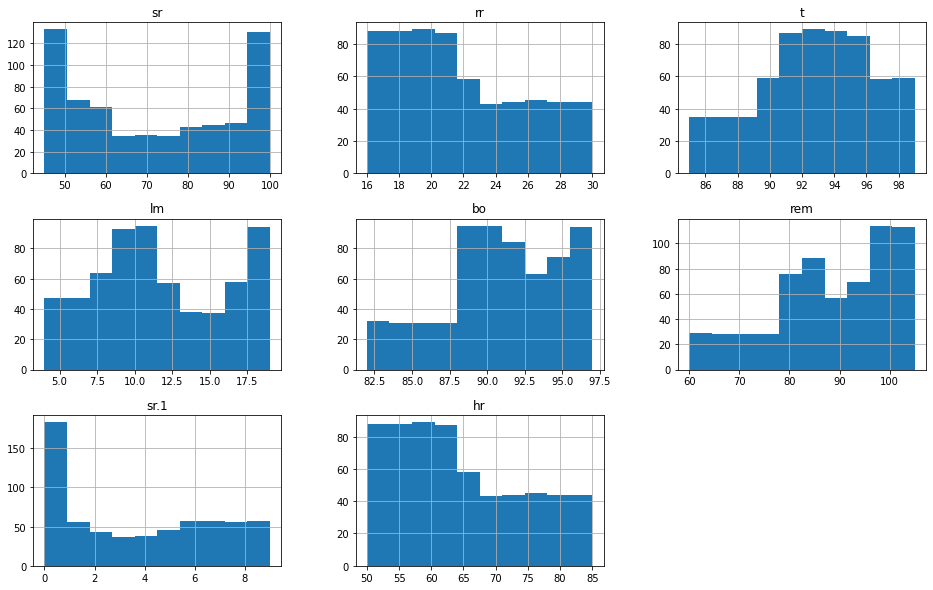

In [6]:
data.hist(column=['sr','rr','t','lm','bo','rem', 'sr.1', 'hr'],figsize=(16,10));

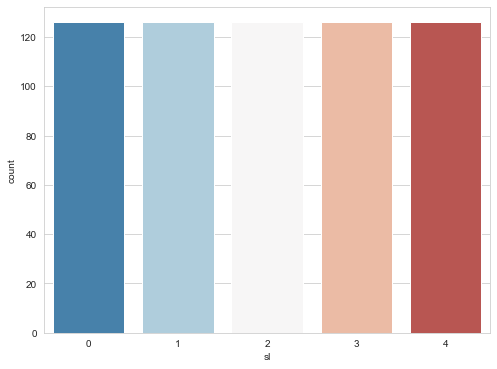

In [7]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='sl',data=data,palette='RdBu_r');

In [8]:
data.groupby('sr')['hr'].agg(['min', 'max']).sort_values(['min'])

,min,max
sr,,
45.000,50.00,50.00
45.040,50.04,50.04
45.080,50.08,50.08
45.120,50.12,50.12
45.160,50.16,50.16
...,...,...
99.872,84.68,84.68
99.904,84.76,84.76
99.936,84.84,84.84


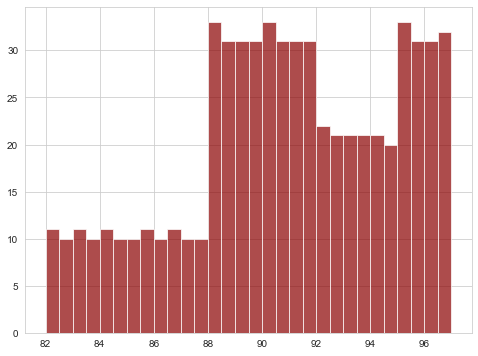

In [9]:
plt.figure(figsize=(8,6))
data['bo'].hist(bins=30,color='darkred',alpha=0.7);

### Feature Scaling

In [10]:
minmaxscaler = MinMaxScaler()

scaled_data = minmaxscaler.fit_transform(data[['sr','rr','t','lm','bo','rem', 'sr.1', 'hr']])
print(scaled_data)

[[0.88727273 0.69142857 0.48857143 ... 0.88       0.20444444 0.69142857]
 [0.848      0.65028571 0.468      ... 0.864      0.17244444 0.65028571]
 [0.27272727 0.28571429 0.78571429 ... 0.55555556 0.77777778 0.28571429]
 ...
 [0.95461818 0.82171429 0.13428571 ... 0.93066667 0.         0.82171429]
 [0.248      0.26628571 0.76628571 ... 0.54044444 0.74755556 0.26628571]
 [0.52581818 0.38514286 0.59942857 ... 0.71022222 0.45422222 0.38514286]]


In [11]:
df = pd.DataFrame(scaled_data, columns =['sr','rr','t','lm','bo','rem', 'sr.1', 'hr'])
df['sl'] = data['sl']
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


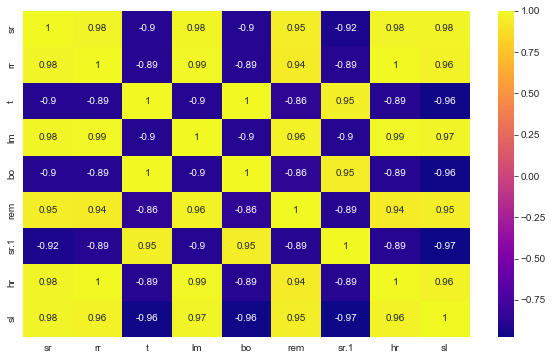

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='plasma');

### Building a Logistic Regression Model

In [13]:
X = df.drop('sl',axis=1)
y = df['sl']

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, 
                                                    random_state=101) # test_size=0.4

In [14]:
data.corr()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
sr,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
rr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
t,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
lm,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
bo,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
rem,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sr.1,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
hr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
sl,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [15]:
print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (378, 8)
Shape of test dataset :  (252, 8)


In [16]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [17]:
# Cross-validation: Split into train and test, and train multiple models by sampling the train set. 
# Finally, just test once on the test set.
#scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
scores = cross_val_score(model, X_test, y_test, cv=10, scoring='accuracy')
scores 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
predictions = model.predict(X_test)
X_test.head()

,sr,rr,t,lm,bo,rem,sr.1,hr
483,0.421091,0.344000,0.558286,0.454400,0.587733,0.646222,0.358222,0.344000
246,0.762909,0.561143,0.423429,0.688000,0.461867,0.829333,0.103111,0.561143
64,0.935418,0.746286,0.040000,0.881600,0.044800,0.901333,0.000000,0.746286
201,0.008000,0.012571,0.804571,0.023467,0.878400,0.039111,0.797333,0.012571
191,0.223273,0.246857,0.746857,0.363733,0.812267,0.525333,0.717333,0.246857


In [19]:
predictions

array([2, 3, 4, 0, 1, 3, 0, 4, 1, 2, 1, 4, 0, 3, 4, 2, 2, 1, 3, 4, 2, 4,
       3, 3, 2, 0, 0, 1, 2, 3, 3, 2, 0, 4, 2, 4, 2, 0, 0, 1, 2, 3, 0, 4,
       0, 0, 3, 0, 1, 0, 3, 1, 4, 3, 4, 1, 1, 1, 1, 2, 4, 3, 3, 1, 1, 4,
       0, 3, 3, 2, 3, 3, 0, 3, 1, 1, 3, 3, 3, 3, 3, 4, 0, 3, 3, 0, 3, 4,
       4, 2, 4, 2, 4, 0, 1, 3, 1, 1, 0, 2, 2, 4, 1, 2, 4, 1, 0, 3, 4, 1,
       2, 4, 1, 1, 2, 4, 2, 2, 0, 0, 2, 2, 3, 0, 4, 0, 4, 3, 1, 3, 2, 1,
       1, 3, 2, 3, 0, 0, 2, 0, 1, 0, 3, 4, 0, 1, 4, 1, 3, 1, 0, 2, 0, 1,
       0, 1, 1, 2, 1, 3, 2, 2, 3, 4, 0, 4, 3, 1, 0, 1, 4, 0, 4, 4, 0, 1,
       3, 1, 3, 4, 2, 3, 3, 3, 0, 3, 1, 1, 2, 0, 3, 3, 1, 2, 0, 4, 0, 0,
       3, 3, 2, 2, 2, 4, 4, 4, 0, 2, 3, 1, 0, 1, 4, 2, 3, 1, 3, 0, 0, 0,
       1, 1, 4, 2, 0, 2, 2, 4, 0, 4, 3, 0, 1, 0, 1, 2, 4, 2, 4, 1, 1, 3,
       4, 4, 1, 1, 2, 2, 3, 3, 0, 3], dtype=int64)

In [20]:
accuracy_score = metrics.accuracy_score(y_test,predictions)
print("Accuracy score : ", accuracy_score)

Accuracy score :  1.0


### Evaluation

In [21]:
print(confusion_matrix(y_test,predictions))

[[51  0  0  0  0]
 [ 0 53  0  0  0]
 [ 0  0 46  0  0]
 [ 0  0  0 57  0]
 [ 0  0  0  0 45]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        45

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



## Decision Tree Classifiction

In [23]:
decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
decisiontree_pred = decisiontree_model.predict(X_test)

In [25]:
print(confusion_matrix(y_test,decisiontree_pred))

[[51  0  0  0  0]
 [ 1 52  0  0  0]
 [ 0  0 46  0  0]
 [ 0  0  0 57  0]
 [ 0  0  0  0 45]]


In [26]:
print(classification_report(y_test,decisiontree_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        53
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        45

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [27]:
dt_accuracy_score = metrics.accuracy_score(y_test, decisiontree_pred)
print("Decision Tree Accuracy Score : ",dt_accuracy_score)

Decision Tree Accuracy Score :  0.996031746031746


### Random Forest Classification

In [28]:
randomforest_model = RandomForestClassifier(n_estimators=500)
randomforest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [29]:
randomforest_pred = randomforest_model.predict(X_test)

print(confusion_matrix(y_test,randomforest_pred))
print("\n")
print(classification_report(y_test,randomforest_pred))
rf_accuracy_score = metrics.accuracy_score(y_test, randomforest_pred)
print("Random Forest Accuracy Score : ",dt_accuracy_score)

[[51  0  0  0  0]
 [ 1 51  1  0  0]
 [ 0  0 46  0  0]
 [ 0  0  0 57  0]
 [ 0  0  0  0 45]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.96      0.98        53
           2       0.98      1.00      0.99        46
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        45

    accuracy                           0.99       252
   macro avg       0.99      0.99      0.99       252
weighted avg       0.99      0.99      0.99       252

Random Forest Accuracy Score :  0.996031746031746


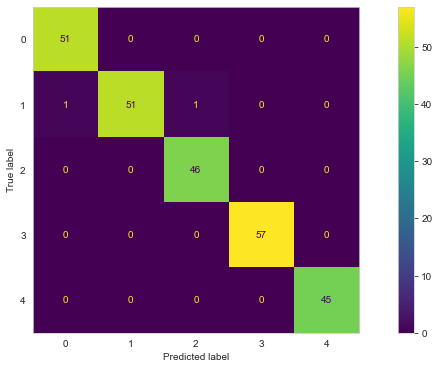

In [30]:
conf_matrix_rfc = confusion_matrix(y_test,randomforest_pred)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix_rfc, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(14, 6))
ax.grid(False)
conf_matrix_display.plot(ax=ax);

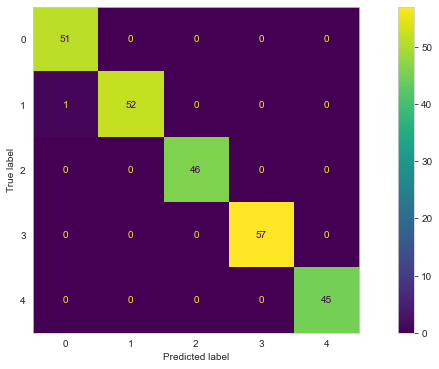

In [31]:
conf_matrix_dtc = confusion_matrix(y_test,decisiontree_pred)
conf_matrix_display_dtc = ConfusionMatrixDisplay(conf_matrix_dtc, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(14, 6))
ax.grid(False)
conf_matrix_display_dtc.plot(ax=ax);

In [32]:
decision_tree = pd.DataFrame(decisiontree_pred, columns= ['decisiontree pred'])
random_forest = pd.DataFrame(randomforest_pred, columns= ['randomforest pred'])

new_data = pd.concat([df, decision_tree,random_forest], axis=1, join='inner')

In [33]:
new_data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl,decisiontree pred,randomforest pred
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3,2,2
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3,3,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1,4,4
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3,0,0
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0,1,1


In [34]:
new_data= new_data[['sl' ,'decisiontree pred','randomforest pred']]
new_data.to_csv('predictions.csv' , index=False)
new_data.head()

,sl,decisiontree pred,randomforest pred
0,3,2,2
1,3,3,3
2,1,4,4
3,3,0,0
4,0,1,1
